In [1]:
from __future__ import print_function
from PYME.recipes import modules
from PYME.LMVis import pipeline
data = pipeline.Pipeline("../data/31_5_series_D.h5r")

Trying to load 3rd party recipe module PYMEcs.recipes.processing
Loaded 3rd party recipe module PYMEcs.recipes.processing
Trying to load 3rd party recipe module PYMEnf.recipes.pymenf
Loaded 3rd party recipe module PYMEnf.recipes.pymenf
Trying to load 3rd party recipe module PYMEcs.recipes.output
Loaded 3rd party recipe module PYMEcs.recipes.output
Trying to load 3rd party recipe module PYMEcs.recipes.localisations
Loaded 3rd party recipe module PYMEcs.recipes.localisations
Trying to load 3rd party recipe module PYMEcs.recipes.base
Loaded 3rd party recipe module PYMEcs.recipes.base


In [2]:
# load our saved recipe
data.recipe.update_from_yaml('example1.yaml')
print("Current data source: %s" % data.selectedDataSourceKey) # what is the currently selected data source
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select

data.selectDataSource('cytosolC')
print("Number of events in data source cytosolC is %d" % data.x.size)

Current data source: filtered_localizations
Available data sources: cytosolC, coalesced, with_clumps, filtered_localizations, Localizations, clumps, colour_mapped
Number of events in data source cytosolC is 964


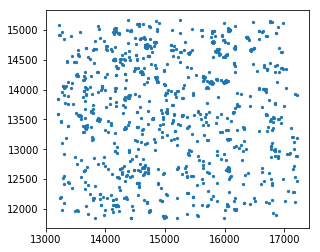

In [6]:
plt.subplot(aspect='equal') # we are trying to get the plot aspect ratio to be correct
plt.scatter(data.x,data.y,s=5)

In [ ]:
from PYMEcs.Analysis.eventProperties import evtDensity
dens, intens5K, trange = evtDensity(data)
print("Density: %.2f, Intensity (5K frames): %.2f, frame range: %.2f Kframes" %(dens, intens5K, trange/1e3))

In [ ]:
# you can also supply a recipe as a multiline string

str = """
- tablefilters.FilterTable:
   filters:
     A: [5, 20000]
     error_x: [0, 30]
     error_y: [0, 30]
     sig: [95, 200]
   inputName: Localizations
   outputName: filtered_loc_from_str
"""

In [ ]:
data.recipe.update_from_yaml('')
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select
data.recipe.update_from_yaml(str)
print("Available data sources: %s" % ', '.join(data.dataSources.keys())) # look at all the data sources we could select

In [ ]:
print("Current data source: %s" % data.selectedDataSourceKey)
data.selectDataSource('coalesced')
print("Current data source: %s" % data.selectedDataSourceKey)
print("Number of events in data source cytosolC is %d" % data.x.size)